In [5]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
class layer:
    def __init__(self, inputs, in_size, out_size, activation_function=None):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size]))
        self.b = tf.Variable(tf.zeros([1,out_size]))
        self.Wx_plus_b = tf.matmul(inputs, self.W) + self.b
#         self.activation_function = activation_function
    def output(self, activation_function=None):
        if activation_function == None:
            result = self.Wx_plus_b
        else :
            result = activation_function(self.Wx_plus_b)
        return result

In [18]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)

# layer1 = layer(x, 784, 100, tf.nn.sigmoid)
# layer2 = layer(layer1.output(), 100, 10, tf.nn.softmax)

# layer1 = layer(xs, 784, 100)
# layer2 = layer(layer1.output(tf.nn.sigmoid), 100, 20)
# layer3 = layer(layer2.output(tf.nn.sigmoid), 20, 2)
# layer4 = layer(layer3.output(tf.nn.sigmoid), 2, 20)
# layer5 = layer(layer4.output(tf.nn.sigmoid), 20, 100)
# layer6 = layer(layer5.output(tf.nn.sigmoid), 100, 784)

layer1 = layer(xs, 784, 100)
layer2 = layer(layer1.output(tf.nn.relu), 100, 20)
layer3 = layer(layer2.output(tf.nn.relu), 20, 2)
layer4 = layer(layer3.output(tf.nn.relu), 2, 20)
layer5 = layer(layer4.output(tf.nn.relu, 20, 100)
layer6 = layer(layer5.output(tf.nn.relu), 100, 784)

# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer6.output(tf.nn.sigmoid)))
loss_ae = tf.reduce_mean(tf.nn.(labels=xs, logits=layer6.output(tf.nn.relu)))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=layer2))
# loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=ys, logits=prediction))

# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
train_step_ae = tf.train.RMSPropOptimizer(0.1).minimize(loss_ae)
# train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
# train_step = tf.train.RMSPropOptimizer(0.01).minimize(loss)
# train_step = tf.train.MomentumOptimizer(0.2,0.1).minimize(loss)

# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [19]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])



epoch:  0  , loss:  0.648566
epoch:  5  , loss:  0.642341
epoch:  10  , loss:  0.641463
epoch:  15  , loss:  0.638367
epoch:  20  , loss:  0.63796
epoch:  25  , loss:  0.636245
epoch:  30  , loss:  0.636245
epoch:  35  , loss:  0.636245
epoch:  40  , loss:  0.635367
epoch:  45  , loss:  0.634498
epoch:  50  , loss:  0.634498
[[  1.00086837e-07   7.95501549e-08   1.00000000e+00 ...,   1.05092369e-07
    9.26985848e-08   9.71832392e-08]
 [  1.00010510e-07   7.94341659e-08   1.00000000e+00 ...,   1.05026231e-07
    9.27850863e-08   9.72377450e-08]
 [  1.00249231e-07   7.96862238e-08   1.00000000e+00 ...,   1.05149908e-07
    9.26487402e-08   9.70415428e-08]
 [  1.00052858e-07   7.95443853e-08   1.00000000e+00 ...,   1.05096973e-07
    9.26816170e-08   9.72186527e-08]]


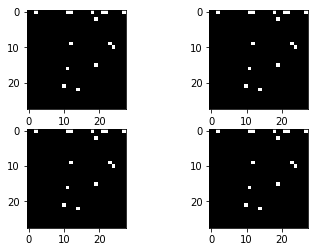

In [20]:
#Autoencoder
for epoch in range(51):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


# x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.relu), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

In [21]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    


x_ae = np.array([np.reshape(m,(28,28)) for m in sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})])
print sess.run(layer6.output(tf.nn.sigmoid), feed_dict={xs:x_train})[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

epoch:  0  , loss:  0.634498
epoch:  5  , loss:  0.634498
epoch:  10  , loss:  0.633655
epoch:  15  , loss:  0.633329
epoch:  20  , loss:  0.633329
epoch:  25  , loss:  0.633329
epoch:  30  , loss:  0.633329
epoch:  35  , loss:  0.633329
epoch:  40  , loss:  0.633329
epoch:  45  , loss:  0.633329
epoch:  50  , loss:  0.633329
epoch:  55  , loss:  0.632865
epoch:  60  , loss:  0.632865
epoch:  65  , loss:  0.632865
epoch:  70  , loss:  0.632865
epoch:  75  , loss:  0.632865
epoch:  80  , loss:  0.632865
epoch:  85  , loss:  0.632865
epoch:  90  , loss:  0.632865
epoch:  95  , loss:  0.632865
epoch:  100  , loss:  0.632865
epoch:  105  , loss:  0.632865
epoch:  110  , loss:  0.632865
epoch:  115  , loss:  0.632865
epoch:  120  , loss:  0.632865
epoch:  125  , loss:  0.632865
epoch:  130  , loss:  0.632865
epoch:  135  , loss:  0.632865
epoch:  140  , loss:  0.632865
epoch:  145  , loss:  0.632865
epoch:  150  , loss:  0.632865
epoch:  155  , loss:  0.632865
epoch:  160  , loss:  0.632865

KeyboardInterrupt: 

In [ ]:
nums_scatter = sess.run(layer3.output(tf.nn.sigmoid), feed_dict={xs:x_train})
for i in nums_scatter:
    plt.scatter(i[0], i[1], c=y_tray_trainininalpha=.5)